### 1.Multi-class and Multi-Label Classification Using Support Vector Machines
##### (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29
#####     Choose 70% of the data randomly as the training set.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import hamming_loss

In [2]:
def standardize(data):
    for i in range(len(data.iloc[0])):
        mean = data.iloc[:,i].mean()
        std = data.iloc[:,i].std()
        if i == 0:
            df1 = pd.DataFrame((data.iloc[:,i]-mean)/std)
        else:
            df2 = pd.DataFrame((data.iloc[:,i]-mean)/std)
            df1 = pd.concat([df1, df2], axis=1, sort=False)
    return df1

In [3]:
data = pd.read_csv("Homework 5 Data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv")

In [4]:
columns = ['Family', 'Genus', 'Species']

In [5]:
std_data = standardize(data.iloc[:,:-4])

In [6]:
std_data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,0.146568,-0.780448,-1.581659,-1.529838,1.168584,1.352233,0.597077,-1.287100,-1.672217,0.540352,...,-1.485794,0.796571,1.265868,-0.551043,-1.427192,-1.007608,0.483443,1.177824,1.023868,-0.595657
1,0.146568,-0.695391,-1.556571,-1.107557,1.300532,1.415261,0.363071,-1.909720,-1.876481,0.903898,...,-1.959042,0.406714,1.412805,-0.250507,-1.301322,-0.758437,0.171669,0.779185,0.565617,-0.474003
2,0.146568,-0.783280,-1.495849,-0.990904,0.915472,0.763445,0.058988,-2.079619,-1.940504,1.388994,...,-1.877072,0.590333,1.647422,0.345859,-1.009536,-0.369932,-0.208947,0.299009,0.777590,-0.084292
3,0.146568,-0.453647,-0.729486,-0.727045,1.505889,2.184716,0.098585,-1.667874,-1.264711,1.686691,...,-2.262323,0.181466,1.077511,-0.769590,-1.627534,-2.180875,-0.981570,-0.016164,-0.704731,-0.515329
4,0.146568,-1.078268,-1.440341,-0.867165,1.252911,1.255732,0.048310,-2.279006,-1.681000,1.655683,...,-2.172608,0.502788,1.710392,0.173250,-0.996448,-0.717886,-0.473393,0.232516,0.897150,-0.067426
5,0.146568,-1.023904,-1.307766,-0.599411,1.336565,1.242650,0.138875,-1.834851,-1.430823,1.741587,...,-2.156167,0.339178,1.505125,0.109910,-1.225363,-1.626808,-1.478017,-0.194577,0.507482,-0.183608
6,0.146568,-1.380762,-1.416550,-0.796916,1.557210,0.673554,-0.234941,-2.166166,-1.649812,1.290559,...,-1.872453,0.434802,1.698508,0.190062,-0.980046,-0.742347,-0.442154,0.468433,0.356322,-0.352611
7,0.146568,-0.816148,-1.308724,-1.009378,0.937124,0.641729,0.041938,-1.573137,-1.601581,1.074506,...,-1.942800,0.198200,1.524448,0.280133,-1.047828,-0.660594,-0.086773,0.327300,0.412372,-0.535865
8,0.146568,-0.238998,-1.075590,-0.438220,1.587895,1.449343,0.581018,-1.490596,-1.598083,1.189484,...,-2.094798,-0.037641,0.885698,-0.619011,-1.516805,-1.420492,-1.301817,-0.693170,-0.500625,-0.690716
9,0.146568,-0.928495,-1.587917,-0.807360,1.458869,1.742507,0.159792,-2.526256,-1.963312,1.671421,...,-2.317180,0.537141,1.802769,0.094854,-1.012303,-0.711916,-0.749456,0.140476,0.665546,0.003707


In [7]:
train_X, test_X, train_y, test_y = train_test_split(data.iloc[:,:-4], data.iloc[:,-4:-1], train_size = 0.7, shuffle = True)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
train_X_std, test_X_std, train_y_std, test_y_std = train_test_split(std_data, data.iloc[:,-4:-1], train_size = 0.7, shuffle = True)

In [9]:
train_y

,Family,Genus,Species
5366,Hylidae,Hypsiboas,HypsiboasCinerascens
3025,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1015,Dendrobatidae,Ameerega,Ameeregatrivittata
5202,Hylidae,Hypsiboas,HypsiboasCinerascens
2241,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
820,Dendrobatidae,Ameerega,Ameeregatrivittata
4929,Hylidae,Dendropsophus,HylaMinuta
5539,Hylidae,Hypsiboas,HypsiboasCordobae
220,Leptodactylidae,Adenomera,AdenomeraAndre
4128,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


##### (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-class classification is to train a classifier for each label. We first try this approach:
#####  i. Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.

In [10]:
def runExact(predict):
    j = 0
    if j == 0:
        df_predict = pd.DataFrame(predict)
        df_predict = df_predict.rename(columns = {0: i})
        j = 1
    else:
        df_predict = pd.concat([df_predict, pd.DataFrame(predict)], axis=1)
        df_predict = df_predict.rename(columns={0: i})
        
    return df_predict

In [11]:
def count_Exact(test_y, df_predict):
    count = 0
    for i in range(len(test_y)):
        if test_y['Family'].iloc[i] == df_predict['Family'].iloc[i] and test_y['Genus'].iloc[i] == df_predict['Genus'].iloc[i] and test_y['Species'].iloc[i] == df_predict['Species'].iloc[i]:
            count = count + 1
    return count

In [12]:
from sklearn.metrics import hamming_loss
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

columns = ['Family', 'Genus', 'Species']
j = 0

for i in columns:
    svc = SVC()
    svc.fit(train_X, train_y[i])
    predict = svc.predict(test_X)
    hl = hamming_loss(test_y[i], predict)
    print("Hamming loss for", i, " : ", hl)
    if j == 0:
        df_predict = pd.DataFrame(predict)
        df_predict = df_predict.rename(columns = {0: i})
        j = 1
    else:
        df_predict = pd.concat([df_predict, pd.DataFrame(predict)], axis=1)
        df_predict = df_predict.rename(columns={0: i})

# exact_match = accuracy_score(test_y, df_predict, normalize=True, sample_weight=None)
# print("Exact match  for", i, " : ",exact_match)

Hamming loss for Family  :  0.06577119036591014
Hamming loss for Genus  :  0.07966651227420102
Hamming loss for Species  :  0.07086614173228346


In [13]:
count = 0
for i in range(len(test_y)):
    if test_y['Family'].iloc[i] == df_predict['Family'].iloc[i] and test_y['Genus'].iloc[i] == df_predict['Genus'].iloc[i] and test_y['Species'].iloc[i] == df_predict['Species'].iloc[i]:
        count = count + 1
print('Exact Match :', count/2159)

Exact Match : 0.8939323761000463


In [14]:
test_y

,Family,Genus,Species
5506,Hylidae,Hypsiboas,HypsiboasCordobae
1231,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
360,Leptodactylidae,Adenomera,AdenomeraAndre
1536,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3746,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
4364,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
381,Leptodactylidae,Adenomera,AdenomeraAndre
675,Dendrobatidae,Ameerega,Ameeregatrivittata
80,Leptodactylidae,Adenomera,AdenomeraAndre
5160,Hylidae,Hypsiboas,HypsiboasCinerascens


In [15]:
df_predict

,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Leptodactylidae,Adenomera,AdenomeraAndre
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
4,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
5,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
6,Leptodactylidae,Adenomera,AdenomeraAndre
7,Dendrobatidae,Ameerega,Ameeregatrivittata
8,Dendrobatidae,Hypsiboas,AdenomeraAndre
9,Hylidae,Hypsiboas,HypsiboasCinerascens


##### ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

In [16]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

C = []
gamma = []
for i in range(-3,6):
    C.append(10**i)
for i in range(1,21):
    gamma.append(i/10)
param_grid  = {'C': C, 'gamma': gamma}


In [17]:
# C = [0.01, 0.1]
# gamma = [0.1, 0.2]
# param_grid  = {'C': C, 'gamma': gamma}

In [18]:
# param_grid

### Raw attributes

In [19]:
k_fold = KFold(10)
model = OneVsRestClassifier(SVC(tol=0.1))
gsc = GridSearchCV(SVC(kernel='rbf', decision_function_shape='ovr'), param_grid = param_grid, cv = 10)
j= 0

for i in columns:
    gsc.fit(train_X, train_y[i])
    width = 1/(np.sqrt(2 * gsc.best_params_.get('gamma')))
    predict_g = gsc.predict(test_X)
    Exact_match_g = accuracy_score(test_y[i], predict_g)
    hammingLoss = hamming_loss(test_y[i], predict_g)
    
    print("Weight of the SVM penalty for", i ,": ", gsc.best_params_)
    print("Best Score for ", i ,": ",  gsc.best_score_)
    print("Width of Gaussian Kernel for",i ,": " ,width)
    print("Exact match for", i ,": ", Exact_match_g)
    print('Hamming Loss for', i ,": ", hammingLoss)
    print('\n')
    if j == 0:
        df_predict_raw = pd.DataFrame(predict_g)
        df_predict_raw  = df_predict_raw.rename(columns = {0: i})
        j = 1
    else:
        df_predict_raw  = pd.concat([df_predict_raw , pd.DataFrame(predict_g)], axis=1)
        df_predict_raw  = df_predict_raw.rename(columns={0: i})

Weight of the SVM penalty for Family :  {'C': 100, 'gamma': 2.0}
Best Score for  Family :  0.9944400317712471
Width of Gaussian Kernel for Family :  0.5
Exact match for Family :  0.9930523390458545
Hamming Loss for Family :  0.006947660954145438


Weight of the SVM penalty for Genus :  {'C': 100, 'gamma': 1.5}
Best Score for  Genus :  0.9930500397140588
Width of Gaussian Kernel for Genus :  0.5773502691896258
Exact match for Genus :  0.9879573876794813
Hamming Loss for Genus :  0.012042612320518759


Weight of the SVM penalty for Species :  {'C': 100, 'gamma': 1.6}
Best Score for  Species :  0.9924543288324067
Width of Gaussian Kernel for Species :  0.5590169943749475
Exact match for Species :  0.9884205650764243
Hamming Loss for Species :  0.01157943492357573




In [41]:
count_raw = 0
for i in range(len(test_y)):
    if test_y['Family'].iloc[i] == df_predict_raw['Family'].iloc[i] and test_y['Genus'].iloc[i] == df_predict_raw['Genus'].iloc[i] and test_y['Species'].iloc[i] == df_predict_raw['Species'].iloc[i]:
        count_raw = count_raw + 1
print('Exact Match for All :', count_raw/2159)
print('Hamming Score for All: ', 1-sum([0.006947660954145438,0.012042612320518759,0.01157943492357573]))

Exact Match for All : 0.9851783232978231
Hamming Score for All:  0.9694302918017601


### Standardized

In [21]:
# k_fold = KFold(10)
# model = OneVsRestClassifier(SVC(tol=0.1))
# gsc = GridSearchCV(SVC(kernel='rbf', decision_function_shape='ovr'), param_grid = param_grid, cv = 10)

# for i in columns:
#     gsc.fit(train_X_std, train_y_std[i])
#     width = 1/(np.sqrt(2 * gsc.best_params_.get('gamma')))
#     predict_g = gsc.predict(test_X_std)
#     Exact_match_g = accuracy_score(test_y_std[i], predict_g)
#     hammingLoss = hamming_loss(test_y_std[i], predict_g)
    
#     print("Weight of the SVM penalty for", i ,": ", gsc.best_params_)
#     print("Best Score for ", i ,": ",  gsc.best_score_)
#     print("Width of Gaussian Kernel for",i ,": " ,width)
#     print("Exact match for", i ,": ", Exact_match_g)
#     print('Hamming Loss for', i ,": ", hammingLoss)
#     print('\n')

##### iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [22]:
def run(train_X_std, train_y_std, i):
    
    gsc.fit(train_X_std, train_y_std[i])
    width = 1/(np.sqrt(2 * gsc.best_params_.get('gamma')))
    predict_g = gsc.predict(test_X_std)
    Exact_match_g = accuracy_score(test_y_std[i], predict_g)
    hammingLoss = hamming_loss(test_y_std[i], predict_g)
    
    print("Weight of the SVM penalty for", i ,": ", gsc.best_params_)
    print("Best Score for ", i ,": ",  gsc.best_score_)
    print("Width of Gaussian Kernel for",i ,": " ,width)
    print("Exact match for", i ,": ", Exact_match_g)
    print('Hamming Loss for', i ,": ", hammingLoss)
    print('\n')

In [23]:
from sklearn.svm import LinearSVC
clf = (LinearSVC(penalty='l1', dual=False))
param_grid_L1 = {'C':[00.1,0.1,1,10,100,1000,10000]}
j = 0

for i in columns:
    gsc_L1 = GridSearchCV(clf, param_grid_L1, cv = 10)

    gsc_L1.fit(train_X, train_y[i])

    predict_L1 = gsc_L1.predict(test_X)
    Exact_match_L1 = accuracy_score(test_y[i], predict_L1)
    hammingLoss_L1 = hamming_loss(test_y[i], predict_L1)
    
    print("Weight of the SVM penalty for", i ,": ", gsc_L1.best_params_)
    print("Best Score for ", i ,": ",  gsc_L1.best_score_)
    print("Exact match for", i ,": ", Exact_match_L1)
    print('Hamming Loss for', i ,": ", hammingLoss_L1)
    print('\n')
    if j == 0:
        df_predict_L1 = pd.DataFrame(predict_L1)
        df_predict_L1 = df_predict_L1.rename(columns = {0: i})
        j = 1
    else:
        df_predict_L1 = pd.concat([df_predict, pd.DataFrame(predict_L1)], axis=1)
        df_predict_L1 = df_predict_L1.rename(columns={0: i})

Weight of the SVM penalty for Family :  {'C': 10000}
Best Score for  Family :  0.9344718030182685
Exact match for Family :  0.9411764705882353
Hamming Loss for Family :  0.058823529411764705


Weight of the SVM penalty for Genus :  {'C': 10}
Best Score for  Genus :  0.9501588562351072
Exact match for Genus :  0.9471977767484947
Hamming Loss for Genus :  0.052802223251505326


Weight of the SVM penalty for Species :  {'C': 1000}
Best Score for  Species :  0.9567116759332804
Exact match for Species :  0.9578508568781844
Hamming Loss for Species :  0.042149143121815655




In [30]:
df_predict_L1 = df_predict_L1.iloc[:,0:3]

In [31]:
count_L1 = 0
for i in range(len(test_y)):
    if test_y['Family'].iloc[i] == df_predict_L1['Family'].iloc[i] and test_y['Genus'].iloc[i] == df_predict_L1['Genus'].iloc[i] and test_y['Species'].iloc[i] == df_predict_L1['Species'].iloc[i]:
        count_L1 = count_L1 + 1

In [40]:
print('Exact Match for All :', count_L1/2159)
print('Hamming Score for All: ', 1-sum([0.058823529411764705,0.052802223251505326,0.042149143121815655]))

Exact Match for All : 0.8939323761000463
Hamming Score for All:  0.8462251042149143


##### iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [33]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

for i in columns:
    X_train_sm, y_train_sm = sm.fit_sample(train_X, train_y[i])
    gsc_L1 = GridSearchCV(clf, param_grid_L1, cv = 10)
    gsc_L1.fit(X_train_sm, y_train_sm)

    predict_L1 = gsc_L1.predict(test_X)
    Exact_match_L1 = accuracy_score(test_y[i], predict_L1)
    hammingLoss_L1 = hamming_loss(test_y[i], predict_L1)
    
    print("Weight of the SVM penalty for", i ,": ", gsc_L1.best_params_)
    print("Best Score for ", i ,": ",  gsc_L1.best_score_)
    print("Exact match for", i ,": ", Exact_match_L1)
    print('Hamming Loss for', i ,": ", hammingLoss_L1)
    print('\n')
    if j == 0:
        df_predict_sm = pd.DataFrame(predict_L1)
        df_predict_sm = df_predict_L1.rename(columns = {0: i})
        j = 1
    else:
        df_predict_sm = pd.concat([df_predict, pd.DataFrame(predict_L1)], axis=1)
        df_predict_sm = df_predict_L1.rename(columns={0: i})

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.


Weight of the SVM penalty for Family :  {'C': 100}
Best Score for  Family :  0.9499513303049968
Exact match for Family :  0.9245020842982863
Hamming Loss for Family :  0.07549791570171376


Weight of the SVM penalty for Genus :  {'C': 1000}
Best Score for  Genus :  0.9539019337016574
Exact match for Genus :  0.9064381658175081
Hamming Loss for Genus :  0.0935618341824919


Weight of the SVM penalty for Species :  {'C': 100}
Best Score for  Species :  0.9582922824302135
Exact match for Species :  0.9573876794812413
Hamming Loss for Species :  0.042612320518758684




In [39]:
count_sm = 0
for i in range(len(test_y)):
    if test_y['Family'].iloc[i] == df_predict_sm['Family'].iloc[i] and test_y['Genus'].iloc[i] == df_predict_sm['Genus'].iloc[i] and test_y['Species'].iloc[i] == df_predict_sm['Species'].iloc[i]:
        count_sm = count_sm + 1
print('Exact Match for All :', count_sm/2159)
print('Hamming Score for All: ', 1-sum([0.07549791570171376,0.0935618341824919,0.042612320518758684]))

Exact Match for All : 0.8939323761000463
Hamming Score for All:  0.7883279295970357


Gaussian Kernel-OneVsAll classifier: 

    Exact match is higher than the Hamming score, which means that exact match is stricter on misclassifications.

Linear SVC with L1 penalty :

    Exact match is also higher than the Hamming score, which means that exact match is stricter on misclassifications.

Linear SVC with L1 penalty(SMOTE):

    There is a little improvement on accuracy for each of the categories after using SMOTE.

Conclusion: The best classification model is gaussian kernal SVM which has the best exact match and hamming score. The SMOTE model is the most inefficient.

### 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set
##### Monte-Carlo Simulation:
##### Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate

##### (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ { 1, 2, . . . , 50 } automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_train_k_means, X_test_k_means, y_train_k_means, y_test_k_means = train_test_split(data.iloc[:,:22], data.iloc[:,22:25], test_size=0)

size = []
for i in range(2,51):
    size.append(i)

result = []
for i in size:
    model = KMeans(n_clusters = i).fit(X_train_k_means)
    predict_k_means = model.predict(X_train_k_means)
    result.append(silhouette_score(X_train_k_means, predict_k_means))

best_k = np.array(result).argmax()

print('Best k : ',best_k + 2)

Best k :  4


##### (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [11]:
kmeans = KMeans(n_clusters = 4).fit(X_train_k_means)
clusters = kmeans.labels_

i0 = np.argwhere(clusters == 0)
i1 = np.argwhere(clusters == 1)
i2 = np.argwhere(clusters == 2)
i3 = np.argwhere(clusters == 3)

hamming_dis = []
name = [[],[],[]]
for i in range(len(columns)):
    print(columns[i]," :")
    
    cluster1 = y_train_k_means[columns[i]].iloc[i0.ravel()]
    name[i].append(cluster1.value_counts().keys().tolist()[0])
    print("Cluster == 0 : ")
    print(cluster1.value_counts().keys().tolist()[0], end = ' ')
    print(cluster1.value_counts().tolist()[0])
    print('\n')
    cluster2 = y_train_k_means[columns[i]].iloc[i1.ravel()]
    name[i].append(cluster2.value_counts().keys().tolist()[0])
    print("Cluster == 1 : ")
    print(cluster2.value_counts().keys().tolist()[0], end = ' ')
    print(cluster2.value_counts().tolist()[0])
    print('\n')
    cluster3 = y_train_k_means[columns[i]].iloc[i2.ravel()]
    name[i].append(cluster3.value_counts().keys().tolist()[0])
    print("Cluster == 2 : ")
    print(cluster3.value_counts().keys().tolist()[0], end = ' ')
    print(cluster3.value_counts().tolist()[0])
    print('\n')
    cluster4 = y_train_k_means[columns[i]].iloc[i3.ravel()]
    name[i].append(cluster4.value_counts().keys().tolist()[0])
    print("Cluster == 3 : ")
    print(cluster4.value_counts().keys().tolist()[0], end = ' ')
    print(cluster4.value_counts().tolist()[0])
    print('\n')
    hamming_dis.append(7195-cluster1.value_counts().tolist()[0]-cluster2.value_counts().tolist()[0]-cluster3.value_counts().tolist()[0]-cluster4.value_counts().tolist()[0])

Family  :
Cluster == 0 : 
Leptodactylidae 3467


Cluster == 1 : 
Hylidae 590


Cluster == 2 : 
Hylidae 1245


Cluster == 3 : 
Dendrobatidae 500


Genus  :
Cluster == 0 : 
Adenomera 3466


Cluster == 1 : 
Hypsiboas 542


Cluster == 2 : 
Hypsiboas 1038


Cluster == 3 : 
Ameerega 500


Species  :
Cluster == 0 : 
AdenomeraHylaedactylus 3466


Cluster == 1 : 
HypsiboasCinerascens 452


Cluster == 2 : 
HypsiboasCordobae 1018


Cluster == 3 : 
Ameeregatrivittata 500




##### (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [12]:
name

[['Leptodactylidae', 'Hylidae', 'Hylidae', 'Dendrobatidae'],
 ['Adenomera', 'Hypsiboas', 'Hypsiboas', 'Ameerega'],
 ['AdenomeraHylaedactylus',
  'HypsiboasCinerascens',
  'HypsiboasCordobae',
  'Ameeregatrivittata']]

In [13]:
pred = kmeans.predict(X_train_k_means)

HL = []
for i in range(len(columns)):
    df = pd.DataFrame(pred,columns=[columns[i]])
    df = df.replace((0,1,2,3),tuple(name[i]))
    HL.append(hamming_loss(y_train_k_means[columns[i]], df))
    
print("Average Hamming loss for : ", sum(HL)/3)
print("Average Hamming score for : ", 1 - sum(HL)/3)
print("Average Hamming distance for : ", sum(hamming_dis))

Average Hamming loss for :  0.22242297892054666
Average Hamming score for :  0.7775770210794534
Average Hamming distance for :  4801


### Run 50 times

In [14]:
def run50():
    kmeans = KMeans(n_clusters = 4).fit(X_train_k_means)
    clusters = kmeans.labels_

    i0 = np.argwhere(clusters == 0)
    i1 = np.argwhere(clusters == 1)
    i2 = np.argwhere(clusters == 2)
    i3 = np.argwhere(clusters == 3)

    name = [[],[],[]]   
    hamming_distance = []
    hamming_loss_stack = []
    for i in range(len(columns)):
#         print(columns[i]," :")

        cluster1 = y_train_k_means[columns[i]].iloc[i0.ravel()]
        name[i].append(cluster1.value_counts().keys().tolist()[0])
#         print("Cluster == 0 : ")
#         print(cluster1.value_counts().keys().tolist()[0], end = ' ')
#         print(cluster1.value_counts().tolist()[0])
#         print('\n')
        cluster2 = y_train_k_means[columns[i]].iloc[i1.ravel()]
        name[i].append(cluster2.value_counts().keys().tolist()[0])
#         print("Cluster == 1 : ")
#         print(cluster2.value_counts().keys().tolist()[0], end = ' ')
#         print(cluster2.value_counts().tolist()[0])
#         print('\n')
        cluster3 = y_train_k_means[columns[i]].iloc[i2.ravel()]
        name[i].append(cluster3.value_counts().keys().tolist()[0])
#         print("Cluster == 2 : ")
#         print(cluster3.value_counts().keys().tolist()[0], end = ' ')
#         print(cluster3.value_counts().tolist()[0])
#         print('\n')
        cluster4 = y_train_k_means[columns[i]].iloc[i3.ravel()]
        name[i].append(cluster4.value_counts().keys().tolist()[0])
#         print("Cluster == 3 : ")
#         print(cluster4.value_counts().keys().tolist()[0], end = ' ')
#         print(cluster4.value_counts().tolist()[0])
        hamming_distance.append(7195-cluster1.value_counts().tolist()[0]-cluster2.value_counts().tolist()[0]-cluster3.value_counts().tolist()[0]-cluster4.value_counts().tolist()[0])
    
    pred = kmeans.predict(X_train_k_means)

    for i in range(len(columns)):
        df = pd.DataFrame(pred,columns=[columns[i]])
        df = df.replace((0,1,2,3),tuple(name[i]))
        hamming_loss_stack.append(hamming_loss(y_train_k_means[columns[i]], df))
    
    return sum(hamming_loss_stack)/3 ,sum(hamming_distance)

In [15]:
hamming_loss_stack = []
hamming_distance = []
for i in range(50):
    hamming_loss_stack.append(run50()[0])
    hamming_distance.append(run50()[1])

### Average Hamming distance, Hamming score, and Hamming loss

In [16]:
print('Average Hamming loss　: ', sum(hamming_loss_stack)/50)
print('Average Hamming score : ', 1-sum(hamming_loss_stack)/50)
print('Average Hamming distance : ', sum(hamming_distance)/50)

Average Hamming loss　:  0.2230845494556403
Average Hamming score :  0.7769154505443597
Average Hamming distance :  4818.64


##### Suppose that we have four observations, for which we compute a dissimilarity matrix, given by

##### For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.
##### (a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.
##### (b) Repeat (a), this time using single linkage clustering.
##### (c) Suppose that we cut the dendogram obtained in (a) such that two clusters result. Which observations are in each cluster?
##### (d) Suppose that we cut the dendogram obtained in (b) such that two clusters result. Which observations are in each cluster?
##### (e) It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

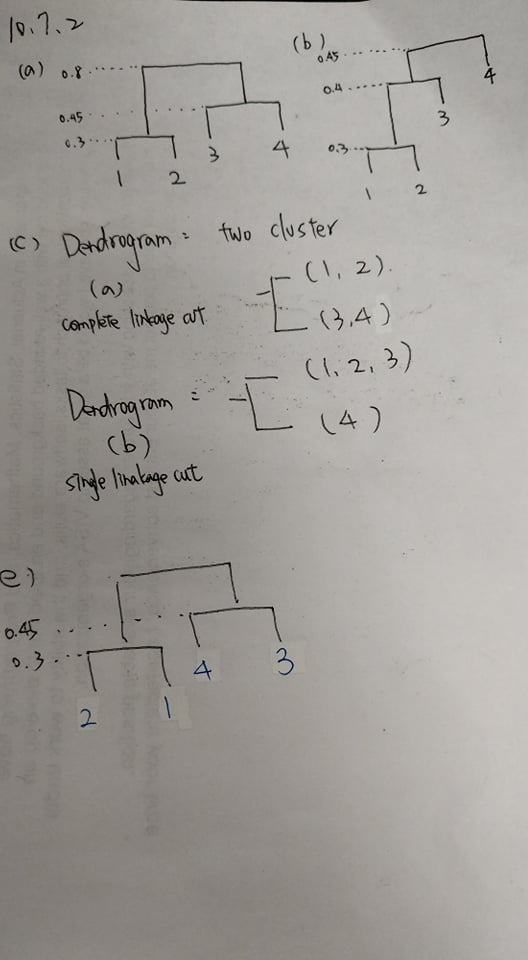

In [49]:
from IPython.display import Image
Image(filename='10.7.2.jpg') 